<a href="https://colab.research.google.com/github/PaulToronto/University-of-Sydney---Math-Courses/blob/main/Introduction_to_Linear_Algebra_1_Geometric_Vectors_in_the_Plane_and_in_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Algebra - 1 - Geometric Vectors in the Plane and in Space

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Geometric Vectors - Part 1

This section covers:

- geometric vectors as directed line segments
- modelling vector quantities, ubiquitous in our physical world
- geometric vectors form a useful and elegant arithmetic
- operations of vector addition and scalar multiplication
- prototype for the general and abstract theory of vector spaces
- developing strong geometric intuition for navigating advanced mathematics

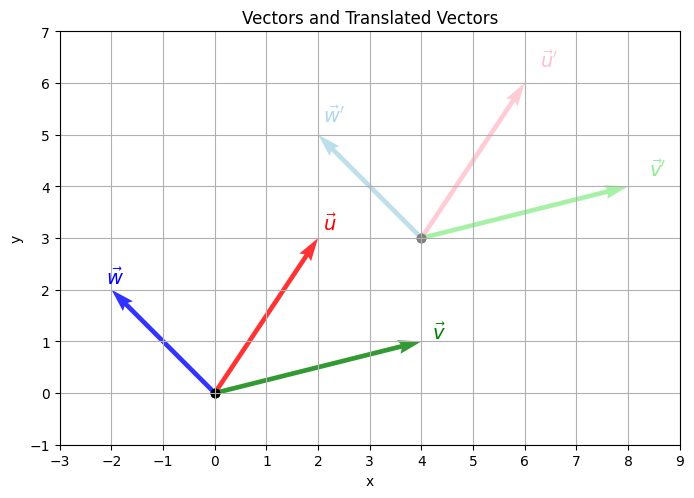

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))

vectors = {
    r'$\vec{u}$': np.array([2, 3]),
    r'$\vec{v}$': np.array([4, 1]),
    r'$\vec{w}$': np.array([-2, 2])
}

colors = ['red', 'green', 'blue']
for i, (name, vec) in enumerate(vectors.items()):
    ax.quiver(0, 0, vec[0], vec[1],
              angles='xy', scale_units='xy', scale=1,
              color=colors[i], alpha=0.8)
    # add labels slightly offset from the arrow tip
    ax.text(vec[0]*1.05, vec[1] * 1.05,
            name, fontsize=14, color=colors[i])
    ax.scatter(0, 0, color='black')

# translation (new origin)
translation = np.array([4, 3])
colors=['pink', 'lightgreen', 'lightblue']
for i, (name, vec) in enumerate(vectors.items()):
    ax.quiver(translation[0], translation[1], vec[0], vec[1],
              angles='xy', scale_units='xy', scale=1,
              color=colors[i], alpha=0.8)
    # add labels slightly offset from the arrow tip
    ax.text((translation[0] + vec[0]) * 1.05, (translation[1] + vec[1]) * 1.05,
            name + r'$^\prime$', fontsize=14, color=colors[i])
    ax.scatter(translation[0], translation[1], color='gray')

ax.set_aspect('equal')
ax.set_xticks(np.arange(-3, 10))
ax.set_yticks(np.arange(-1, 8))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vectors and Translated Vectors')
ax.grid()
plt.show()

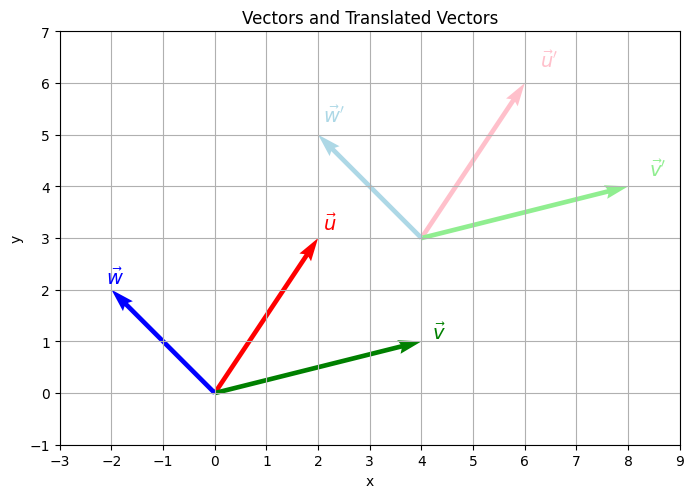

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

vectors = np.array([
    [2, 3],
    [4, 1],
    [-2, 2]
])

# origin for all vectors
colors = ['r', 'g', 'b']
origin = np.zeros((2, vectors.shape[0]))
ax.quiver(*origin, vectors[:, 0], vectors[:, 1],
          angles='xy', scale_units='xy', scale=1,
          color=colors)

names = ['u', 'v', 'w']
for i, (x, y) in enumerate(vectors):
    label = rf'$\vec{{{names[i]}}}$'
    plt.text(x * 1.05, y * 1.05, label, fontsize=14, color=colors[i])

# translation (new origin)
translation = np.array([4, 3])
colors=['pink', 'lightgreen', 'lightblue']
origin += translation[:, np.newaxis]
ax.quiver(*origin, vectors[:, 0], vectors[:, 1],
          angles='xy', scale_units='xy', scale=1,
          color=colors)
for i, (x, y) in enumerate(vectors + translation):
    label = rf'$\vec{{{names[i]}}}^\prime$'
    plt.text(x * 1.05, y * 1.05, label, fontsize=14, color=colors[i])


ax.set_aspect('equal')
ax.set_xticks(np.arange(-3, 10))
ax.set_yticks(np.arange(-1, 8))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vectors and Translated Vectors')
ax.grid()
plt.show()

If $\vec{v}$ represents a vector, then it's magnitude (or length) is represented by $\|\vec{v}\|$.

$$
\|\vec{v}\| = \sqrt{v_1^2 + v_2^2}
$$

A **scalar** an be a real number or a complex number

- Scalar quantities:
  - mass
  - time
  - distance
  - speed
  - temperature
- Vector quantities (magnitude and direction):
  - displacement
  - velocity
  - acceleration
  - force

### Point Notation

$\vec{v}$ starts at point $P$ ends at point $Q$.

$$
\vec{v} = \vec{PQ}
$$

Interchanging the points produces a different vector.

$$
\vec{PQ} \ne \vec{QP}
$$

Unless $P = Q$, in which case the vector degenerates to a single point.

Vectors are **free to float in space**. We can forget about the points and just let the arrow move parallel to itself, creating a multitude of identical copies, all with the same length and pointing in the same direction.

**$\vec{u} = \vec{v}$ precisely when $\vec{u}$, $\vec{v}$ have the same magnitude and direction.**

**$\vec{u} = \vec{v}$ precisely when $\vec{u}$ can be moved parallel to itself to cover $\vec{v}$ exactly.**

### Addition of Vectors

- line them up tip to tail and look for the net effect

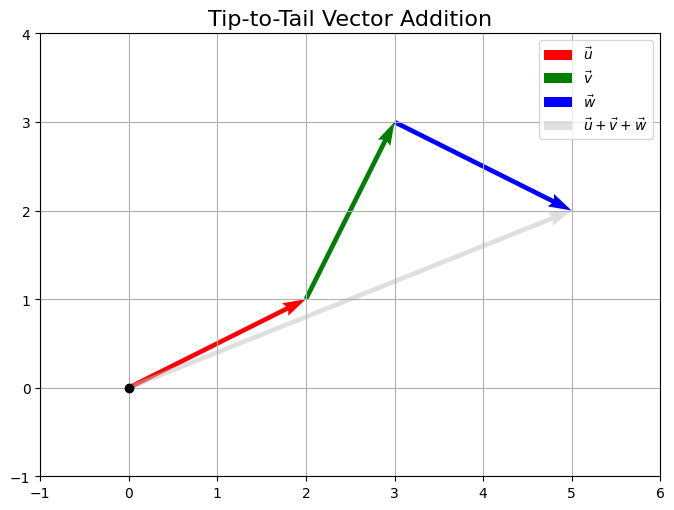

In [4]:
# Create a few vectors
vectors = np.array([
    [2, 1],    # u
    [1, 2],    # v
    [2, -1]    # w
])

names = ['u', 'v', 'w']

# colors for each vector
colors = ['red', 'green', 'blue']

# Starting point
start = np.array([0, 0])
origin = start.copy()

fig, ax = plt.subplots(figsize=(8, 8))

for i, (vec, name, color) in enumerate(zip(vectors, names, colors)):
    end = start + vec # move to the tip of the vector

    # draw the vector
    ax.quiver(*start, *vec,
              angles='xy', scale_units='xy', scale=1,
              color=color, label=rf'$\vec{{{name}}}$')

    # update start to be teh end of the current vector (chaining)
    start = end

# displacement vector
displacement = start - origin
ax.quiver(*origin, *displacement,
          angles='xy', scale_units='xy', scale=1,
          color='silver', alpha=0.5, label=r'$\vec{u} + \vec{v} + \vec{w}$')

# draw the origin
ax.plot(0, 0, 'ko')

ax.set_title('Tip-to-Tail Vector Addition', fontsize=16)
ax.set_xticks(np.arange(-1, 7))
ax.set_yticks(np.arange(-1, 5))
ax.grid(True)
ax.autoscale(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

### Parallelogram Law

$$
\vec{u} + \vec{v} = \vec{v} + \vec{u}
$$

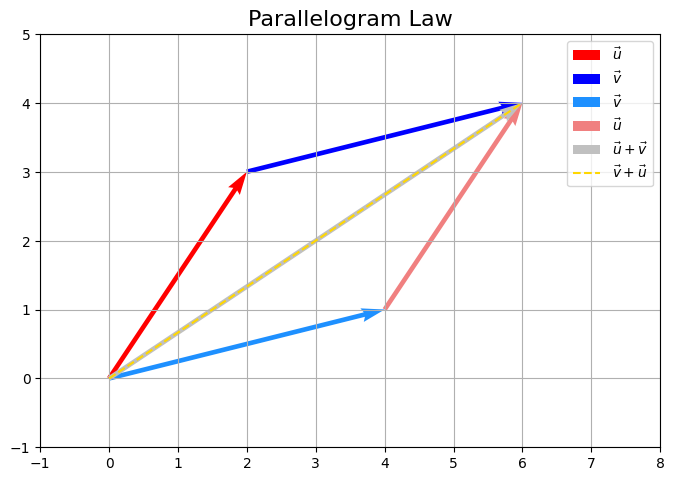

In [5]:
u = np.array([2, 3])
v = np.array([4, 1])

origin = np.array([0, 0])

fig, ax = plt.subplots(figsize=(8, 8))

ax.quiver(*origin, *u,
          angles='xy', scale_units='xy', scale=1,
          color='red', label=r'$\vec{u}$')
ax.quiver(*u, *v,
          angles='xy', scale_units='xy', scale=1,
          color='blue', label=r'$\vec{v}$')
ax.quiver(*origin, *v,
          angles='xy', scale_units='xy', scale=1,
          color='dodgerblue', label=r'$\vec{v}$')
ax.quiver(*v, *u,
          angles='xy', scale_units='xy', scale=1,
          color='lightcoral', label=r'$\vec{u}$')
ax.quiver(*origin, *(u + v),
          angles='xy', scale_units='xy', scale=1,
          color='silver', label=r'$\vec{u} + \vec{v}$')
ax.plot([origin[0], (v + u)[0]], [origin[1], (v + u)[1]],
          color='gold', linestyle='dashed', label=r'$\vec{v} + \vec{u}$')

ax.set_title('Parallelogram Law', fontsize=16)
ax.set_xticks(np.arange(-1, 9))
ax.set_yticks(np.arange(-1, 6))
ax.grid(True)
ax.autoscale(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

### Commutative Law for Vector Addition

$$
\vec{u} + \vec{v} = \vec{v} + \vec{u}
$$

### Associative Law for Vector Addition

$$
\left(\vec{u} + \vec{v}\right) + \vec{w} = \vec{u} + \left(\vec{v} + \vec{w}\right)
$$

### Using Point Notation

$$
\vec{PQ} + \vec{QR} = \vec{PR}
$$

- $Q$ "drops out"

### Proof of Associative Law using Point Notation

Suppose $\vec{u} = \vec{PQ}$, $\vec{v} = \vec{QR}$ and $\vec{w} = \vec{RS}$.

LHS:

$$
\begin{align}
\left(\vec{u} + \vec{v}\right) + \vec{w} &= \left(\vec{PQ} + \vec{QR}\right) + \vec{RS} \\
&= \vec{PR} + \vec{RS} \\
&== \vec{PS}
\end{align}
$$

RHS:

$$
\begin{align}
\vec{u} + \left(\vec{v} + \vec{w}\right) &= \vec{PQ} + \left(\vec{QR} + \vec{RS}\right) \\
&= \vec{PQ} + \vec{QS} \\
&= \vec{PS}
\end{align}
$$

LHS = RHS

### Multiplication by a Scalar

$$
\lambda\vec{v}
$$

- $\lambda$ is a **scalar**
- $\lambda$ scales the vector
  - When $\lambda \gt 1$, the vector gets longer
  - When $0 \lt \lambda \lt 1$, the vector gets shorte
  - When $\lambda < 0$, the vector reverses direction in addition to scaling
  - When $\lambda = -1$, the vector reverses direction, but is not scaled

If $\vec{v} = \vec{PQ}$, then $-\vec{v} = \vec{QP}$

$$
\begin{align}
\vec{v} + \left(-\vec{v}\right) &= \vec{PQ} + \vec{QP} \\
&= \vec{PP} \\
&= \vec{0}
\end{align}
$$

The **zero vector** has 0 length and points in every direction.

$$
\vec{v} + \left(-\vec{v}\right) = \left(-\vec{v}\right) + \vec{v} = \vec{0}
$$

Multiplying a vector by the $0$ scalar produces the zero vector.

$$
0\vec{v} = \vec{0}
$$

The zero vector is called the **additive identity element**.

$$
\vec{v} + \vec{0} = \vec{0} + \vec{v} = \vec{0}
$$

### Subtraction of Vectors

$$
\vec{v} - \vec{w} = \vec{v} + \left(-\vec{w}\right)
$$

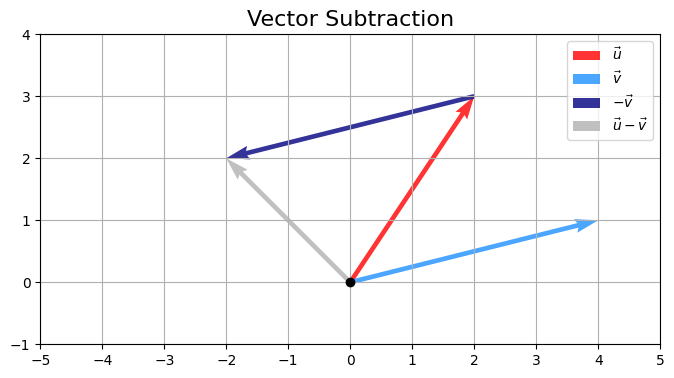

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

vectors = {
    r'$\vec{u}$': np.array([2, 3]),
    r'$\vec{v}$': np.array([4, 1])
}

colors = ['red', 'dodgerblue']
for i, (name, vec) in enumerate(vectors.items()):
    ax.quiver(0, 0, vec[0], vec[1],
              angles='xy', scale_units='xy', scale=1,
              color=colors[i], alpha=0.8, label=name)

# reverse direction and translate vector v
translation = vectors[r'$\vec{u}$'].copy()
v = vectors[r'$\vec{v}$']
ax.quiver(translation[0], translation[1], -v[0], -v[1],
          angles='xy', scale_units='xy', scale=1,
          color='navy', alpha=0.8, label=r'$-\vec{v}$')

# vector difference
u_minus_v = vectors[r'$\vec{u}$'] - vectors[r'$\vec{v}$']
ax.quiver(0, 0, u_minus_v[0], u_minus_v[1],
          angles='xy', scale_units='xy', scale=1,
          color='silver', label=r'$\vec{u} - \vec{v}$')

# draw the origin
ax.plot(0, 0, 'ko')

ax.set_title('Vector Subtraction', fontsize=16)
ax.set_xticks(np.arange(-5, 6))
ax.set_yticks(np.arange(-1, 5))
ax.grid(True)
ax.autoscale(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

### Vector Subtraction and the Parallelogram Law

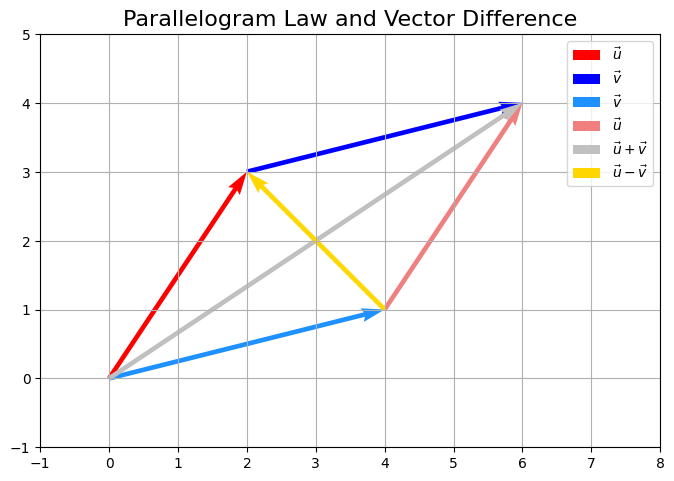

In [7]:
u = np.array([2, 3])
v = np.array([4, 1])

origin = np.array([0, 0])

fig, ax = plt.subplots(figsize=(8, 8))

ax.quiver(*origin, *u,
          angles='xy', scale_units='xy', scale=1,
          color='red', label=r'$\vec{u}$')
ax.quiver(*u, *v,
          angles='xy', scale_units='xy', scale=1,
          color='blue', label=r'$\vec{v}$')
ax.quiver(*origin, *v,
          angles='xy', scale_units='xy', scale=1,
          color='dodgerblue', label=r'$\vec{v}$')
ax.quiver(*v, *u,
          angles='xy', scale_units='xy', scale=1,
          color='lightcoral', label=r'$\vec{u}$')
ax.quiver(*origin, *(u + v),
          angles='xy', scale_units='xy', scale=1,
          color='silver', label=r'$\vec{u} + \vec{v}$')
ax.quiver(*v, *(u - v),
          angles='xy', scale_units='xy', scale=1,
          color='gold', label=r'$\vec{u} - \vec{v}$')

ax.set_title('Parallelogram Law and Vector Difference', fontsize=16)
ax.set_xticks(np.arange(-1, 9))
ax.set_yticks(np.arange(-1, 6))
ax.grid(True)
ax.autoscale(False)
ax.set_aspect('equal')
ax.legend()
plt.show()

### Applications to Geometry

**Fact**:

The diagonals of a parallelogram bisect each other.



### The converse also holds

**Proposition**:

Suppose $PQRS$ is a quadrilateral such that the *diagonals bisect each other*.
Then $PQRS$ is a parallelogram.

**Proof**

<img src='https://drive.google.com/uc?export=view&id=1vcAS7FnauTHsGNB4wwvVZpbvKmw8OqAt'>

Suppose $T$ is the midpoint of $PR$ and $QS$. It does not look that way in the diagram, but suppose it is viewed from a particular perspective in space.

We are given that:

$$
\vec{PT} = \vec{TR}
\text{ and }
\vec{TQ} = \vec{ST}
$$

Then:

$$
\begin{align}
\vec{PQ} &= \vec{PT} + \vec{TQ} \\
&= \vec{TR} + \vec{ST} \\
&= \vec{ST} + \vec{TR} \\
&= \vec{SR}
\end{align}
$$

$\vec{PT} = \vec{SR}$ which suffices to prove that $PQRS$ is a parallelogram.

### Proof Template

#### $X$ is an "expansion or "change"

$$
\vec{PQ} = \vec{PT} + \vec{TQ}
$$

#### $Y$ is "easy"

$$
\begin{align}
&= \vec{TR} + \vec{ST} \\
&= \vec{ST} + \vec{TR}
\end{align}
$$

#### $X^{-1}$ is a "contraction" or "unchange"
$$
\begin{align}
&= \vec{SR}
\end{align}
$$

#### $Z$ is "tricky" or "difficult"
$$
Z = XYX^{-1}
$$

### Conjugation Principle

To do something difficult $\left(Z\right)$, look for an **invertible** transformation $\left(X\right)$ that makes it easy $\left(Y\right)$, and then return $\left(X^{-1}\right)$.

$XYX^{-1}$ is called a **conjugate** in **group theory**.

This can be thought of as **obstacle avoidance**.

### Linear Algebra Principle

Move in **straight lines** if you can.

### Theorem

The midpoints of the sides of any quadrilateral form a parallelogram.

<table>
<tr>
<td>
<img src='https://drive.google.com/uc?export=view&id=17CyfE6kZMS-HPW7KvSBsQvX40cKcqYYz'>
</td>
<td>
<img src='https://drive.google.com/uc?export=view&id=1LHhSIwuzNYaDBIpf8ZvgBGfa1GCx8RkW'>
</td>
</tr>
</table>

**Proof:**

We need to show that $ABCD$ is a parallelogram.

$$
\begin{align}
\vec{AQ} &= \frac{1}{2}\vec{PQ} \\
\vec{QB} &= \frac{1}{2}\vec{QR} \\
\vec{DS} &= \frac{1}{2}\vec{PS} \\
\vec{SC} &= \frac{1}{2}\vec{SR}
\end{align}
$$

We have,

$$
\begin{align}
\vec{AB} &= \vec{AQ} + \vec{QB} \\
&= \frac{1}{2}\vec{PQ} + \frac{1}{2}\vec{QR} \\
&= \frac{1}{2}\left(\vec{PQ} + \vec{QR}\right) \\
&= \frac{1}{2}\vec{PR} \\
&= \frac{1}{2}\left(\vec{PS} + \vec{SR}\right) \\
&= \frac{1}{2}\vec{PS} + \frac{1}{2}\vec{SR} \\
&= \vec{DS} + \vec{SC} \\
&= \vec{DC}
\end{align}
$$

$\vec{AB} = \vec{DC}$ which is sufficient to prove that $ABCD$ is a parallelogram.

### The Triangle Inequality

$$
\left|\vec{v} + \vec{w}\right| \le \left|\vec{v}\right| + \left|\vec{2}\right|
$$